In [28]:
root_path = "/content/drive/MyDrive/Colab Notebooks/CS583 Project/"

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [29]:
image_df = pd.read_csv(root_path+'image_df.csv')
image_df.head()

,Image_Path,Start_Date,End_Date,Prediction
0,img_data/image_0.png,14-11-2013,28-01-2014,Low
1,img_data/image_10.png,29-11-2013,11-02-2014,Low
2,img_data/image_20.png,13-12-2013,26-02-2014,High
3,img_data/image_30.png,30-12-2013,12-03-2014,Low
4,img_data/image_40.png,14-01-2014,26-03-2014,Low


In [6]:
image_paths = image_df['Image_Path']
labels = image_df['Prediction']


In [33]:
#checking image height and width
img = load_img(root_path+image_paths[0], color_mode='grayscale')
print(img_to_array(img).shape)

(288, 576, 1)


In [41]:
images = []
for path in tqdm(image_paths):
    img = load_img(root_path + path, color_mode='grayscale', target_size=(288, 576))  # Setting desired height and width based on above cell
    img_array = img_to_array(img)
    images.append(img_array)


100%|██████████| 247/247 [00:01<00:00, 192.64it/s]


In [68]:
images = np.array(images)
labels = np.array([1 if l=="High" else 0 for l in labels]) #converting labels in binary

In [69]:
#train test split
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=369)
print(train_images.shape, val_images.shape)

(197, 288, 576, 1) (50, 288, 576, 1)


In [70]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(288, 576, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])


In [71]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(val_images, val_labels))


Epoch 1/20
7/7 [==============================] - 1s 124ms/step - loss: 3.5056e-04 - accuracy: 1.0000 - val_loss: 1.9282 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 1s 121ms/step - loss: 0.0128 - accuracy: 0.9898 - val_loss: 2.5776 - val_accuracy: 0.4000
Epoch 3/20
7/7 [==============================] - 1s 120ms/step - loss: 7.4158e-04 - accuracy: 1.0000 - val_loss: 2.3809 - val_accuracy: 0.5800
Epoch 4/20
7/7 [==============================] - 1s 120ms/step - loss: 3.2787e-04 - accuracy: 1.0000 - val_loss: 2.1060 - val_accuracy: 0.5800
Epoch 5/20
7/7 [==============================] - 1s 131ms/step - loss: 3.0481e-06 - accuracy: 1.0000 - val_loss: 2.0088 - val_accuracy: 0.6000
Epoch 6/20
7/7 [==============================] - 1s 143ms/step - loss: 2.5817e-06 - accuracy: 1.0000 - val_loss: 2.0276 - val_accuracy: 0.5800
Epoch 7/20
7/7 [==============================] - 1s 128ms/step - loss: 1.2539e-06 - accuracy: 1.0000 - val_loss: 2.0450 - val_accuracy: 0.5

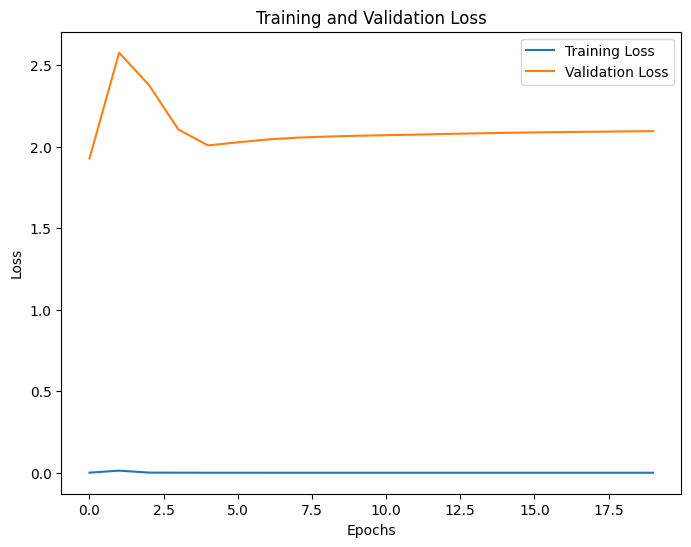

In [75]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:

# Make predictions
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(val_labels, predicted_classes))


2/2 [==============================] - 0s 37ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        25
           1       0.00      0.00      0.00        25

    accuracy                           0.50        50
   macro avg       0.25      0.50      0.33        50
weighted avg       0.25      0.50      0.33        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
